In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'
os.chdir(data_dir)

In [7]:
dat=pd.read_csv("dm.csv")
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [8]:
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [9]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [10]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [11]:
X=pd.get_dummies(X)

In [12]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [13]:
y=dat['AmountSpent']

In [14]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [15]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [16]:
reg.score(X_test,y_test)

0.5915701153457273

In [17]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [18]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

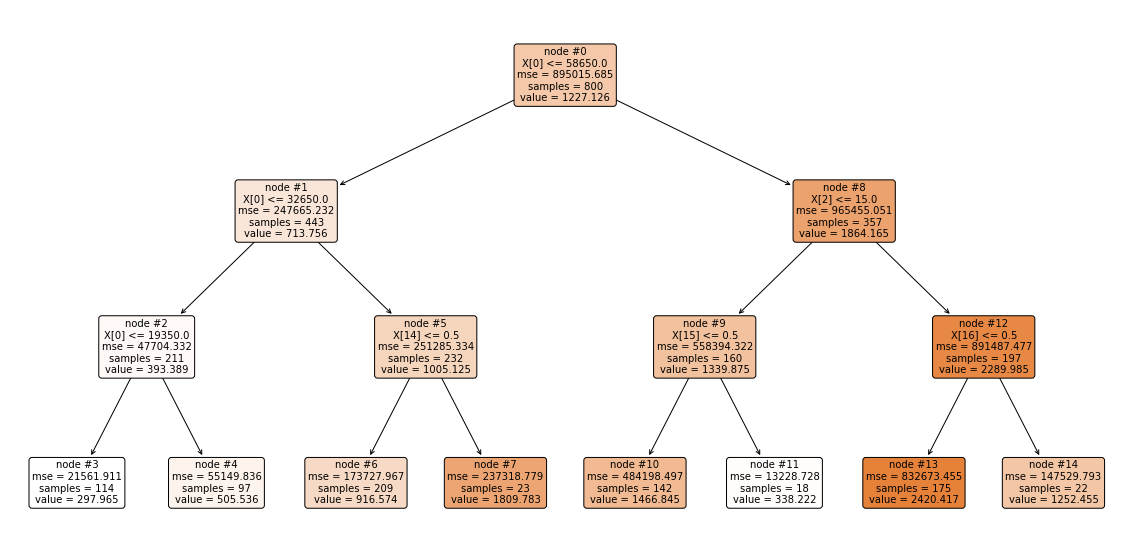

In [25]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(reg, fontsize=10, filled=True, rounded=True, node_ids = True)
plt.show()

In [19]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 

In [20]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

In [21]:
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found